# **Customer Segmentation using Unsupervised Machine Learning in Python**

Customer Segmentation involves grouping of cusomter based on shared characteristics , behaviour and preference.By segmentation customers,business can tailor their strategies and target specific group more effectively and enhance their productivity.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df=pd.read_csv('/content/new customer segementation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
# to check shape and size
print(df.shape)
print(df.size)

(2240, 29)
64960


# **Data Preprocessing**

To get the information of the dataset like null values , dtypes we will use
.info() method

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
#check the descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


There is huge scale difference between the table values.

There are 24 null values in Income columns ,we will remove this null values as it is very less compared to size of Dataset so this will not affect our dataset much .

In [7]:
# to find the number of unique values
df.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


We can see that Columns "Dt_customer" contain data values being Object type .
we will convert it into 3 columns i.e day, month ,year

In [8]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'], errors='coerce')

# extracting month
df['Month']=df['Dt_Customer'].dt.month

#extracting year
df['Year']=df['Dt_Customer'].dt.year

#extracting date
df['Day']=df['Dt_Customer'].dt.day

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Month,Year,Day
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,4.0,2012.0,9.0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,8.0,2014.0,3.0
2,4141,1965,Graduation,Together,71613.0,0,0,NaT,26,426,...,0,0,0,0,3,11,0,NaN,NaN,NaN
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,10.0,2014.0,2.0
4,5324,1981,PhD,Married,58293.0,1,0,NaT,94,173,...,0,0,0,0,3,11,0,NaN,NaN,NaN


In [9]:
# print(df.size)
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,1324
Recency,0
MntWines,0


In [10]:
#now we got all important features we will remove the unncessary columns
df.drop(['Z_CostContact','Z_Revenue','Dt_Customer'],axis=1,inplace=True)

In [11]:
print('Dataset shape before removing the null values ',df.shape)
df.dropna(inplace=True)
print('Dataset shape after removing the null values ',df.shape)

Dataset shape before removing the null values  (2240, 29)
Dataset shape after removing the null values  (905, 29)


# **Data Visualisation and Analysis**

In [12]:
# we will be using bar plot and count plot

obj = df.select_dtypes(include='object').columns
print(obj)

numeric=df.select_dtypes(include='number').columns
print(numeric)

Index(['Education', 'Marital_Status'], dtype='object')
Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Month', 'Year',
       'Day'],
      dtype='object')


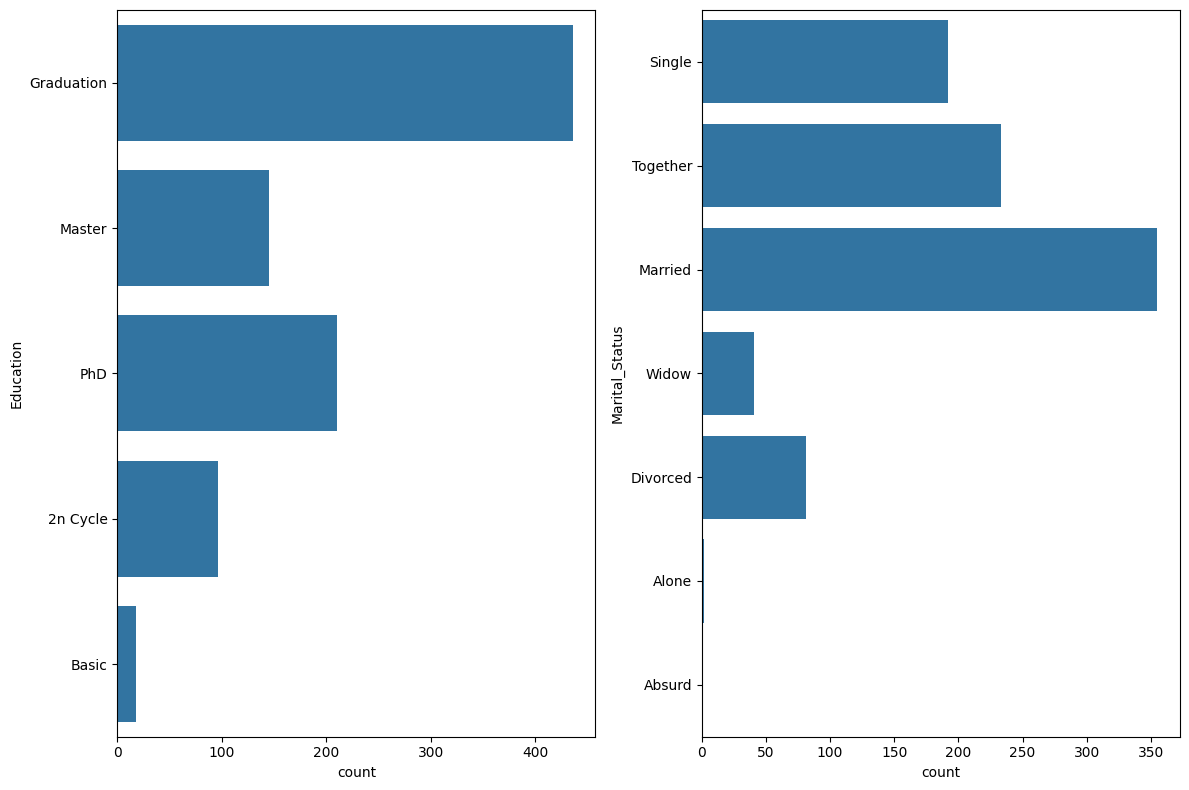

In [13]:
#visualising using countplot

plt.figure(figsize=(12,8))  #setting figure size

for i,col in enumerate(obj):
  plt.subplot(1,2,i+1)
  sns.countplot(df[col])
plt.tight_layout()
plt.show()


In [14]:
#checking value count of the Martial status
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,355
Together,233
Single,192
Divorced,81
Widow,41
Alone,2
Absurd,1


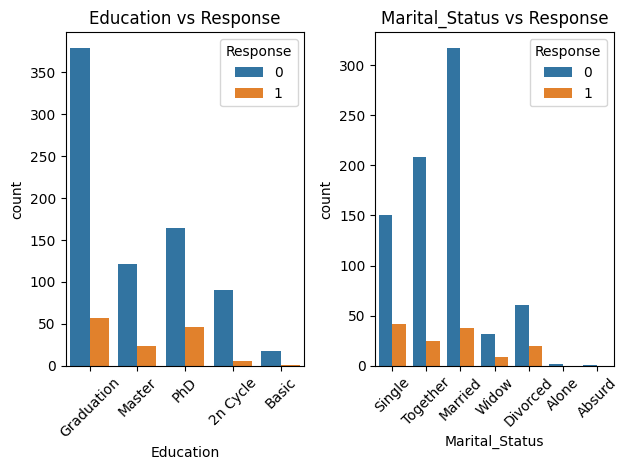

In [15]:
for i,col in enumerate(obj):
  plt.subplot(1,2,i+1)
  sns.countplot(x=col,hue='Response',data=df)
  plt.title(f'{col} vs Response')
  plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [16]:
# Encoding the categorical values
for col in obj:
  # intialising the encoder
  Le=LabelEncoder()
  df[col]=Le.fit_transform(df[col])

Heatmap is the best way to visualize the correlation among the different features of dataset. Let’s give it the value of 0.8

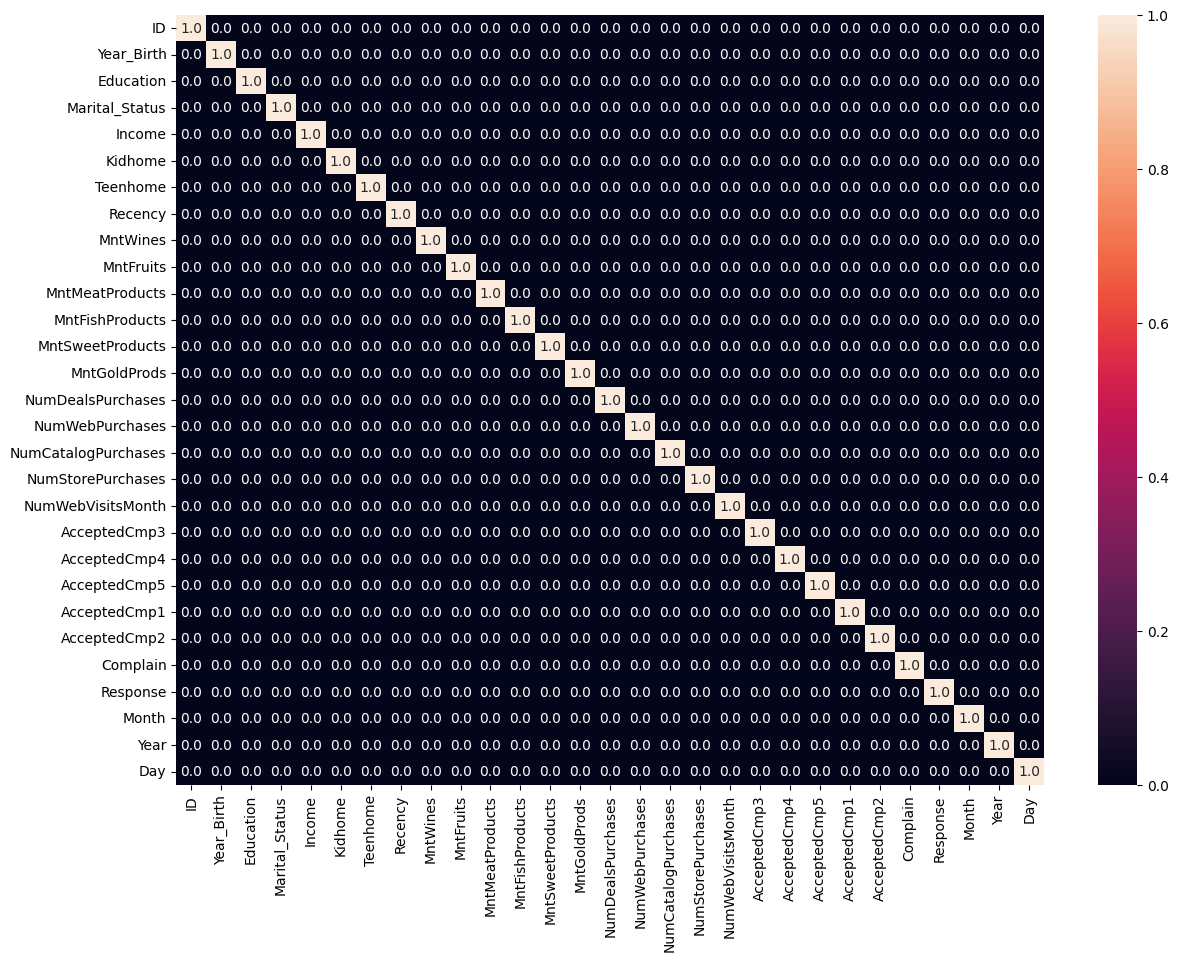

In [17]:
plt.figure(figsize=(14,10))

sns.heatmap(df.corr(numeric_only=True)> 0.8,annot=True,fmt='.1f')
plt.show()

In [21]:
#standardising the numerical values


# intialising the scaler
Sc=StandardScaler()

df=Sc.fit_transform(df)

array([[-0.08209205, -1.01561853, -0.33407271, ..., -0.75854559,
        -1.47054304,  0.69300259],
       [-1.1091023 , -1.26940632, -0.33407271, ...,  0.36729904,
         1.44477229, -1.01667667],
       [ 0.11963115,  1.26847156, -0.33407271, ...,  0.93022135,
         1.44477229, -1.30162321],
       ...,
       [ 1.11598438,  0.67630005, -0.33407271, ..., -1.32146791,
        -0.01288537, -0.16183704],
       [ 0.79101994,  0.42251227, -0.33407271, ..., -1.60292907,
        -0.01288537,  0.1231095 ],
       [-0.5489985 , -1.94617375,  1.36922757, ...,  0.93022135,
         1.44477229, -0.16183704]])